In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from gated import *
# from resnet_gated_without_skip import *
# from resnet_gated import *
from resnet import *
from train import train, test
from dataset import *

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
# model.eval()

Training on 6073 examples, validating on 911 examples...
dilation [False, False, False]
stride 1
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
downsample
stride 2
LeakyReLU(negative_slope=0.01)
LeakyReLU(negative_slope=0.01)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0520, Train Acc: 29.90
Val Loss: 0.0496, Val Acc: 38.09
Epoch 2 of 25
Train Loss: 0.0402, Train Acc: 41.64
Val Loss: 0.0489, Val Acc: 38.86
Epoch 3 of 25
Train Loss: 0.0333, Train Acc: 50.09
Val Loss: 0.0374, Val Acc: 45.12
Epoch 4 of 25
Train Loss: 0.0279, Train Acc: 56.73
Val Loss: 0.0311, Val Acc: 53.90
Epoch 5 of 25
Train Loss: 0.0227, Train Acc: 64.24
Val Loss: 0.0290, Val Acc: 58.29
Epoch 6 of 25
Train Loss: 0.0188, Train Acc: 69.59
Val 

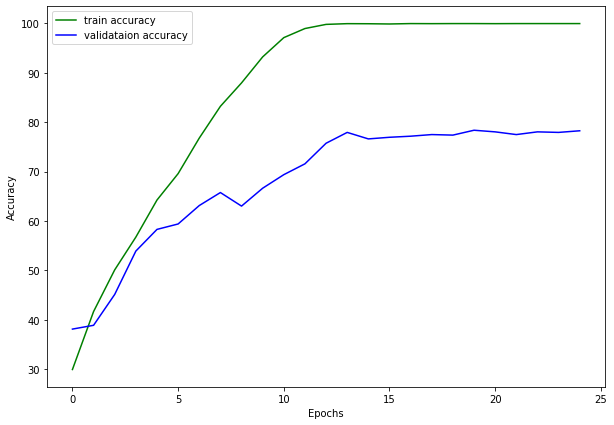

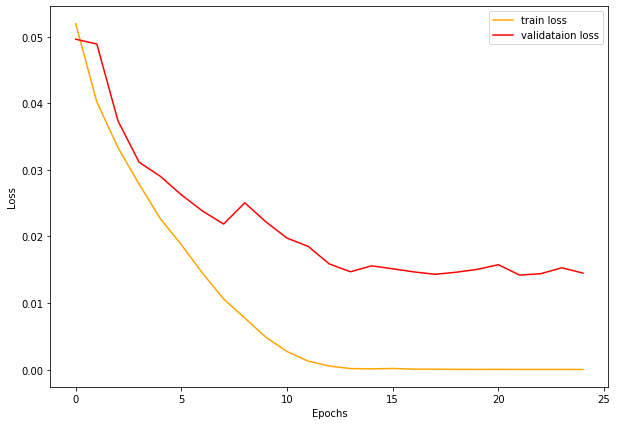

In [11]:
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18(pretrained=False, activation='leakyrelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0533, Train Acc: 28.21
Val Loss: 0.0580, Val Acc: 28.87
Epoch 2 of 25
Train Loss: 0.0414, Train Acc: 40.31
Val Loss: 0.0437, Val Acc: 40.50
Epoch 3 of 25
Train Loss: 0.0341, Train Acc: 48.20
Val Loss: 0.0365, Val Acc: 49.29
Epoch 4 of 25
Train Loss: 0.0279, Train Acc: 56.84
Val Loss: 0.0340, Val Acc: 51.59
Epoch 5 of 25
Train Loss: 0.0228, Train Acc: 64.61
Val Loss: 0.0275, Val Acc: 59.17
Epoch 6 of 25
Train Loss: 0.0181, Train Acc: 70.49
Val Loss: 0.0265, Val Acc: 59.28
Epoch 7 of 25
Train Loss: 0.0140, Train Acc: 77.21
Val Loss: 0.0238, Val Acc: 64.11
Epoch 8 of 25
Train Loss: 0.0103, Train Acc: 83.85
Val Loss: 0.0239, Val Acc: 62.35
Epoch 9 of 25
Train Loss: 0.0069, Train Acc: 89.86
V

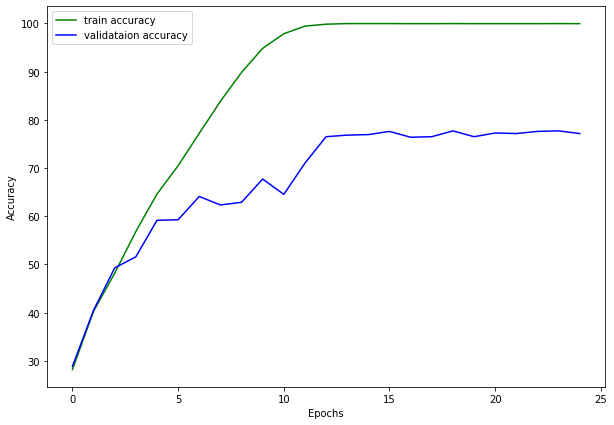

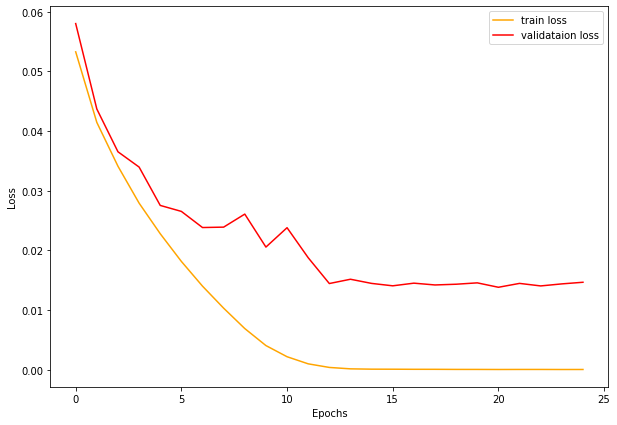

In [12]:
model = resnet18(pretrained=False, activation='relu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
downsample
stride 2
ELU(alpha=1.0)
ELU(alpha=1.0)
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0520, Train Acc: 30.25
Val Loss: 0.0512, Val Acc: 35.35
Epoch 2 of 25
Train Loss: 0.0405, Train Acc: 41.35
Val Loss: 0.0416, Val Acc: 43.80
Epoch 3 of 25
Train Loss: 0.0345, Train Acc: 48.23
Val Loss: 0.0353, Val Acc: 48.41
Epoch 4 of 25
Train Loss: 0.0298, Train Acc: 53.86
Val Loss: 0.0327, Val Acc: 51.70
Epoch 5 of 25
Train Loss: 0.0254, Train Acc: 59.59
Val Loss: 0.0318, Val Acc: 54.34
Epoch 6 of 25
Train Loss: 0.0215, Train Acc: 64.93
Val Loss: 0.0294, Val Acc: 58.18
Epoch 7 of 25
Train Loss: 0.0180, Train Acc: 70.59
Val Loss: 0.0254, Val Acc: 59.28
Epoch 8 of 25
Train Loss: 0.0150, Train Acc: 75.14
Val Loss: 0.0249, Val

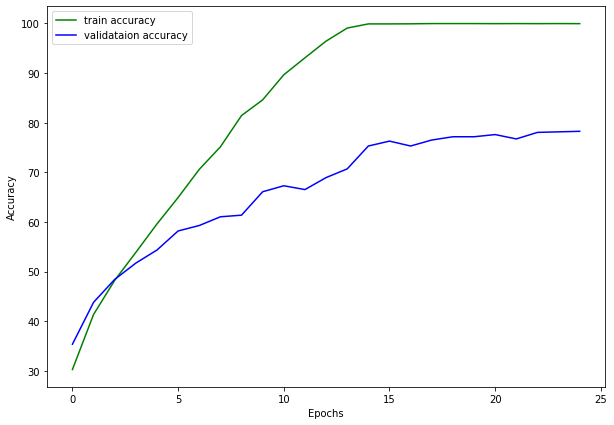

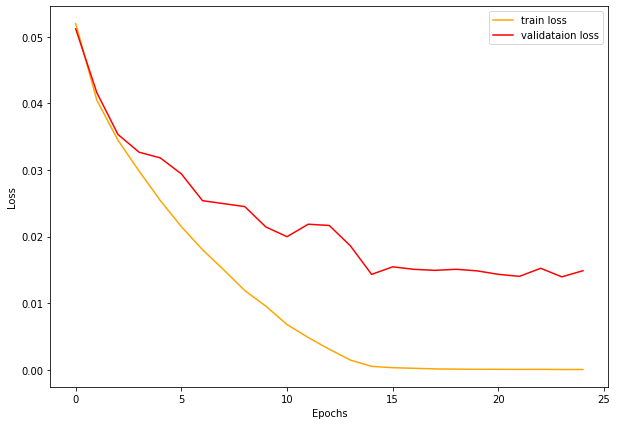

In [13]:
model = resnet18(pretrained=False, activation='elu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0506, Train Acc: 31.12
Val Loss: 0.0452, Val Acc: 40.40
Epoch 2 of 25
Train Loss: 0.0379, Train Acc: 44.26
Val Loss: 0.0420, Val Acc: 43.69
Epoch 3 of 25
Train Loss: 0.0313, Train Acc: 52.26
Val Loss: 0.0343, Val Acc: 53.35
Epoch 4 of 25
Train Loss: 0.0254, Train Acc: 59.89
Val Loss: 0.0289, Val Acc: 55.43
Epoch 5 of 25
Train Loss: 0.0205, Train Acc: 67.69
Val Loss: 0.0278, Val Acc: 60.48
Epoch 6 of 25
Train Loss: 0.0158, Train Acc: 74.79
Val Loss: 0.0235, Val Acc: 64.65
Epoch 7 of 25
Train Loss: 0.0118, Train Acc: 80.83
Val Loss: 0.0260, Val Acc: 60.26
Epoch 8 of 25
Train Loss: 0.0087, Train Acc: 86.28
Val Loss: 0.0221, Val Acc: 65.75
Epoch 9 of 25
Train Loss: 0.0054, Train Acc: 91.98
V

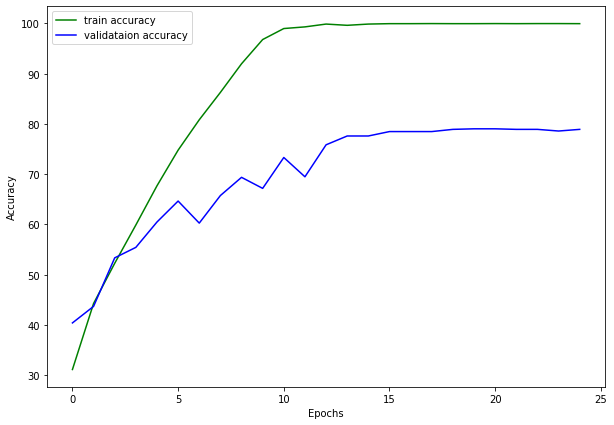

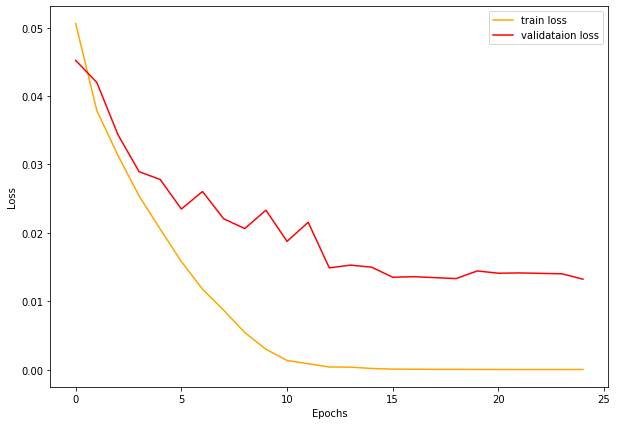

In [14]:
model = resnet18(pretrained=False, activation='gelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
downsample
stride 2
Sigmoid()
Sigmoid()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0524, Train Acc: 29.44
Val Loss: 0.0581, Val Acc: 27.33
Epoch 2 of 25
Train Loss: 0.0420, Train Acc: 39.49
Val Loss: 0.0469, Val Acc: 35.89
Epoch 3 of 25
Train Loss: 0.0360, Train Acc: 45.76
Val Loss: 0.0423, Val Acc: 38.42
Epoch 4 of 25
Train Loss: 0.0307, Train Acc: 52.69
Val Loss: 0.0372, Val Acc: 48.52
Epoch 5 of 25
Train Loss: 0.0271, Train Acc: 57.37
Val Loss: 0.0361, Val Acc: 48.96
Epoch 6 of 25
Train Loss: 0.0239, Train Acc: 62.03
Val Loss: 0.0321, Val Acc: 53.35
Epoch 7 of 25
Train Loss: 0.0204, Train Acc: 66.74
Val Loss: 0.0285, Val Acc: 57.30
Epoch 8 of 25
Train Loss: 0.0177, Train Acc: 70.72
Val Loss: 0.0331, Val Acc: 48.85
Epoch 9 of 25
Train Loss: 0.

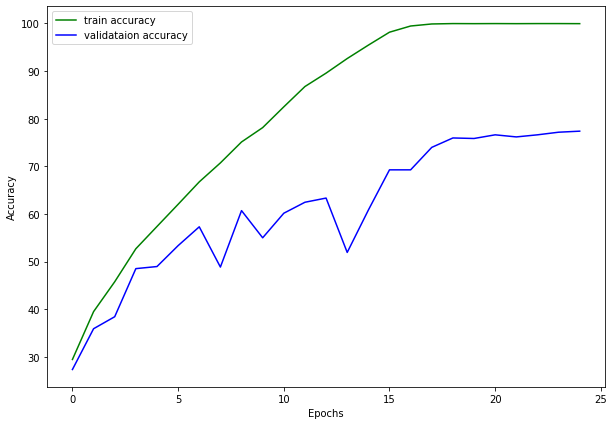

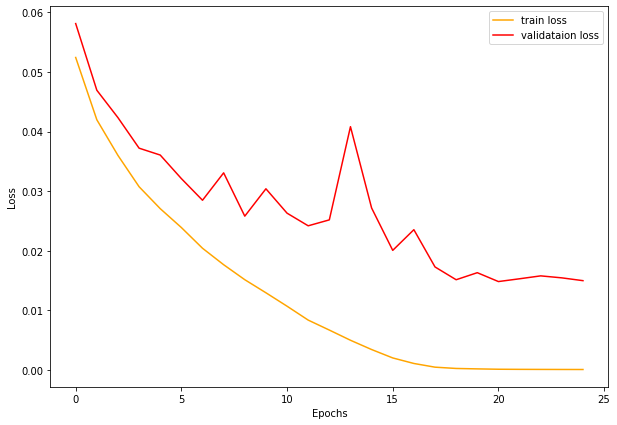

In [15]:
model = resnet18(pretrained=False, activation='sigmoid').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
downsample
stride 2
Tanh()
Tanh()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0525, Train Acc: 29.15
Val Loss: 0.0496, Val Acc: 36.22
Epoch 2 of 25
Train Loss: 0.0405, Train Acc: 41.31
Val Loss: 0.0399, Val Acc: 45.44
Epoch 3 of 25
Train Loss: 0.0344, Train Acc: 48.05
Val Loss: 0.0405, Val Acc: 44.90
Epoch 4 of 25
Train Loss: 0.0295, Train Acc: 53.96
Val Loss: 0.0359, Val Acc: 50.27
Epoch 5 of 25
Train Loss: 0.0252, Train Acc: 60.15
Val Loss: 0.0291, Val Acc: 57.19
Epoch 6 of 25
Train Loss: 0.0217, Train Acc: 65.22
Val Loss: 0.0301, Val Acc: 56.53
Epoch 7 of 25
Train Loss: 0.0183, Train Acc: 70.23
Val Loss: 0.0277, Val Acc: 56.97
Epoch 8 of 25
Train Loss: 0.0147, Train Acc: 76.72
Val Loss: 0.0254, Val Acc: 59.93
Epoch 9 of 25
Train Loss: 0.0120, Train Acc: 80.80
V

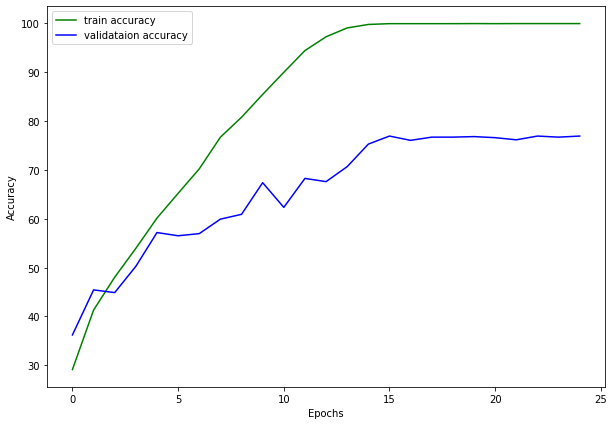

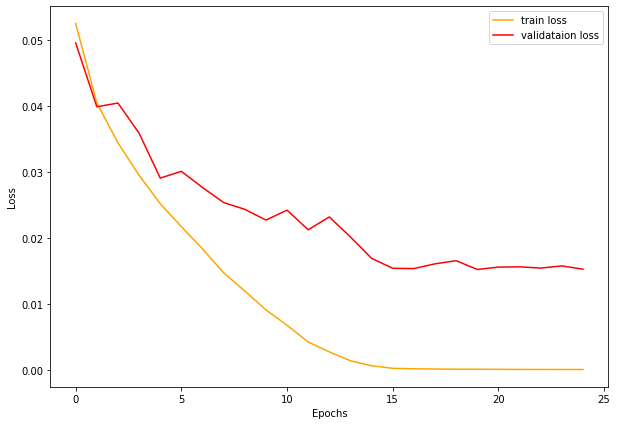

In [16]:
model = resnet18(pretrained=False, activation='tanh').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

Training on 6073 examples, validating on 911 examples...
dilation [False, False, False]
stride 1
downsample
stride 2
downsample
stride 2
downsample
stride 2
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0557, Train Acc: 25.24
Val Loss: 0.0579, Val Acc: 30.74
Epoch 2 of 25
Train Loss: 0.0464, Train Acc: 35.21
Val Loss: 0.0449, Val Acc: 39.52
Epoch 3 of 25
Train Loss: 0.0408, Train Acc: 41.18
Val Loss: 0.0423, Val Acc: 44.57
Epoch 4 of 25
Train Loss: 0.0360, Train Acc: 46.50
Val Loss: 0.0378, Val Acc: 47.20
Epoch 5 of 25
Train Loss: 0.0321, Train Acc: 50.73
Val Loss: 0.0353, Val Acc: 50.27
Epoch 6 of 25
Train Loss: 0.0276, Train Acc: 56.84
Val Loss: 0.0297, Val Acc: 56.53
Epoch 7 of 25
Train Loss: 0.0238, Train Acc: 61.83
Val Loss: 0.0284, Val Acc: 58.29
Epoch 8 of 25
Train Loss: 0.0198, Train Acc: 68.14
Val Loss: 0.0258, Val Acc: 61.91
Epoch 9 of 25
Train Loss: 0.0160, Train Acc: 74.10


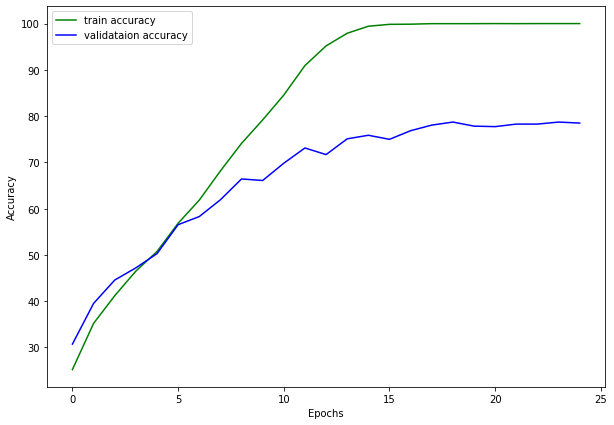

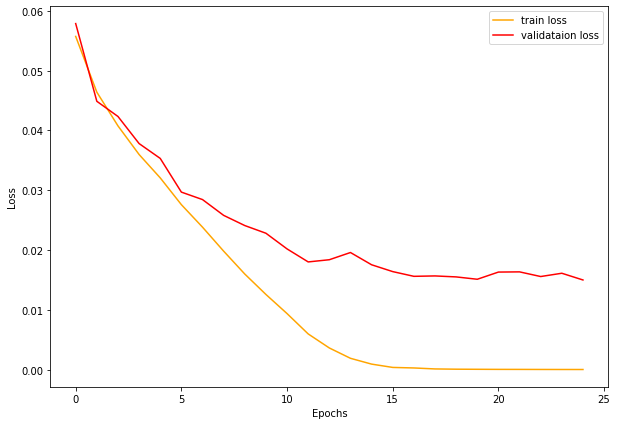

In [17]:
from resnet_gated_without_skip import *
print(f"Training on {len(train_data)} examples, validating on {len(val_data)} examples...")
model = resnet18_gated_without_skip(pretrained=False).to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))